<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

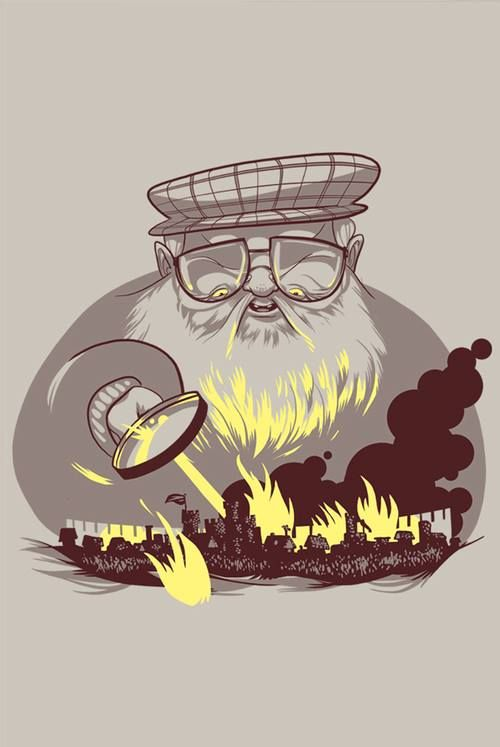

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [158]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 68.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 102MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [160]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [161]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [162]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [163]:
data.drop(['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1, inplace=True)

In [164]:
data['isDead'] = 305 - data['dateOfBirth'] > data['age']
data.age.fillna(data[data.age.notna()].age.median(), inplace=True)
data[data.age.notna()].age.median()

<ipython-input-164-f2e78729c00a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.age.fillna(data[data.age.notna()].age.median(), inplace=True)


24.0

In [165]:
data

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isDead
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,0,0,0,0,0,0,0,24.0,11,0.605351,0,False
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,False
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,0,0,0,1,0,0,1,24.0,0,0.267559,1,False
4,Aemma Arryn,Queen,0,NaN,82.0,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,True
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,1,0,1,1,0,0,1,24.0,0,0.160535,1,False
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,1,1,0,0,0,0,0,24.0,0,0.040134,0,False
1555,Matthos Seaworth,NaN,1,NaN,NaN,House Seaworth,0,1,1,1,1,0,0,24.0,0,0.076923,0,False


In [166]:
data.title.fillna('Unknown', inplace=True)
data.culture.fillna('Unknown', inplace=True)
data.house.fillna('Unknown', inplace=True)

<ipython-input-166-11bfff4e71cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.title.fillna('Unknown', inplace=True)
<ipython-input-166-11bfff4e71cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [167]:
data['isPopular'] = data['popularity'] > 0.5
data['boolDeadRelations'] = data['numDeadRelations'] > 0

In [168]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'ironborn': ['ironmen']
}

cult_rev = {val: key for key in cult.keys() for val in cult[key]}

In [169]:
data.culture = data.culture.str.lower()
data['culture'] = data.culture.replace(cult_rev).where(data['culture'].isin(cult_rev), 'Unknown')

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [170]:
data.drop(columns=['title', 'name', 'popularity', 'numDeadRelations', 'dateOfBirth', 'house'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [171]:
data.isAlive.value_counts()

,count
isAlive,
1,1212
0,345


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [172]:
data

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isDead,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,1,Unknown,0,0,0,0,0,0,0,24.0,0,False,True,True
2,1,Unknown,1,1,1,1,1,1,1,97.0,1,False,True,True
3,1,Unknown,0,0,0,1,0,0,1,24.0,1,False,False,False
4,0,Unknown,0,0,0,0,0,1,1,23.0,0,True,False,False
5,0,Dornish,0,0,0,1,0,1,1,29.0,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,Unknown,1,0,1,1,0,0,1,24.0,1,False,False,False
1554,0,Unknown,1,1,0,0,0,0,0,24.0,0,False,False,False
1555,1,Unknown,0,1,1,1,1,0,0,24.0,0,False,False,False


In [173]:
from sklearn.preprocessing import LabelEncoder

oh = pd.get_dummies(data['culture'])
data = pd.concat([data, oh], axis=1).drop('culture', axis=1)

In [174]:
data.dtypes

,0
male,int64
book1,int64
book2,int64
book3,int64
book4,int64
book5,int64
isMarried,int64
isNoble,int64
age,float64
isAlive,int64


In [175]:
num_features = data.columns[:14]
num_features

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'age', 'isAlive', 'isDead', 'isPopular', 'boolDeadRelations',
       'Andal'],
      dtype='object')

<Axes: >

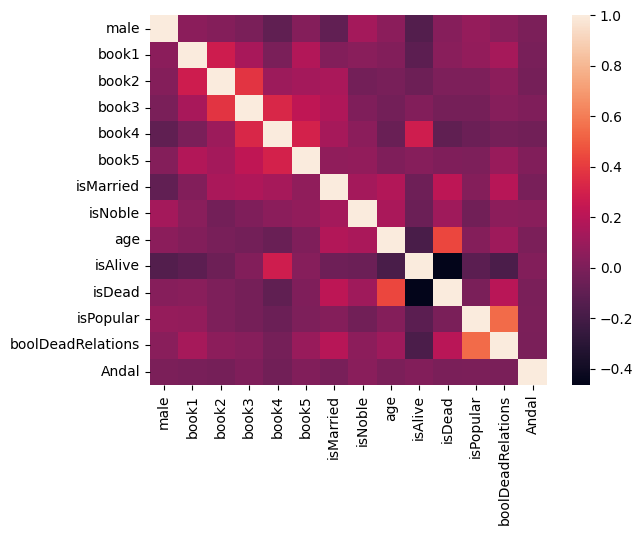

In [176]:
sns.heatmap(data[num_features].corr())

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [177]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [180]:
X

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isDead,...,Northmen,Norvoshi,Qartheen,Reach,Stormlander,Summer Islands,Unknown,Westermen,Westerosi,ironborn
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,24.0,False,...,False,False,False,False,False,False,True,False,False,False
2,1,1,1,1,1,1,1,1,97.0,False,...,False,False,False,False,False,False,True,False,False,False
3,1,0,0,0,1,0,0,1,24.0,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0,0,0,0,1,1,23.0,True,...,False,False,False,False,False,False,True,False,False,False
5,0,0,0,0,1,0,1,1,29.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,24.0,False,...,False,False,False,False,False,False,True,False,False,False
1554,0,1,1,0,0,0,0,0,24.0,False,...,False,False,False,False,False,False,True,False,False,False
1555,1,0,1,1,1,1,0,0,24.0,False,...,False,False,False,False,False,False,True,False,False,False


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [181]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [182]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [183]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
lr_y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [184]:
# Шаг 1. создание модели
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
gpc = GaussianProcessClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
tree = DecisionTreeClassifier()

ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [ 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

gpc_params = {
    'n_restarts_optimizer': [0, 3, 5],
    'max_iter_predict': [100, 200, 300]
}

gnb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

knn_params = {
    'n_neighbors': [3, 5, 7, 12, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

svc_params = {
    'C': [0.1, 1.0, 10.0],
    'gamma': ['scale', 0.1, 1.0, 10.0],
}

tree_params = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

best_score = 0
best_model = ada
for estimator, params, name in zip([ada, rf, gpc, gnb, knn, svc, tree],
                                   [ada_params, rf_params, gpc_params, gnb_params, knn_params, svc_params, tree_params],
                                   ['ada', 'rf', 'gpc', 'gnb', 'knn', 'svc', 'tree']):
    search = RandomizedSearchCV(
        estimator,
        params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
        )

    search.fit(X_train, y_train)
    print(name, "Лучший скор:", search.best_score_)
    if search.best_score_ > best_score:
        best_model = search.best_estimator_
        best_score = search.best_score_

# # Шаг 2. обучение модели
# ada.fit(X_train, y_train)
# rf.fit(X_train, y_train)
# gpc.fit(X_train, y_train)
# gnb.fit(X_train, y_train)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)
# tree.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
# ada_y_pred = ada.predict(X_test)
# rf_y_pred = rf.predict(X_test)
# gpc_y_pred = gpc.predict(X_test)
# gnb_y_pred = gnb.predict(X_test)
# knn_y_pred = knn.predict(X_test)
# svc_y_pred = svc.predict(X_test)
# tree_y_pred = tree.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ada Лучший скор: 0.8427930245854774
rf Лучший скор: 0.84805889079474


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


gpc Лучший скор: 0.8148027444253859


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


gnb Лучший скор: 0.7490708976558034
knn Лучший скор: 0.7981761006289307
svc Лучший скор: 0.8337164093767868
tree Лучший скор: 0.8405231560891938


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [185]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [186]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8632


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [145]:
# # Шаг 3. Предсказание на тестовых данных


# # Шаг 4. Оценка предсказания по метрике accuracy
# accuracy_ada = accuracy_score(y_test, ada_y_pred)
# print("Accuracy ada : %.4f" % accuracy_ada)
# accuracy_rf = accuracy_score(y_test, rf_y_pred)
# print("Accuracy RF : %.4f" % accuracy_rf)
# accuracy_gpc = accuracy_score(y_test, gpc_y_pred)
# print("Accuracy GPC: %.4f" % accuracy_gpc)
# accuracy_gnb = accuracy_score(y_test, gnb_y_pred)
# print("Accuracy GNB: %.4f" % accuracy_gnb)
# accuracy_knn = accuracy_score(y_test, knn_y_pred)
# print("Accuracy KNN: %.4f" % accuracy_knn)
# accuracy_svc = accuracy_score(y_test, svc_y_pred)
# print("Accuracy SVC: %.4f" % accuracy_svc)
# accuracy_tree = accuracy_score(y_test, tree_y_pred)
# print("Accuracy tree: %.4f" % accuracy_tree)

In [187]:
y_pred_best_model = best_model.predict(X_test)

accuracy_best_model = accuracy_score(y_test, y_pred_best_model)
print("Accuracy : %.4f" % accuracy_best_model)

Accuracy : 0.8547


In [188]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [189]:
data_test.drop(['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1, inplace=True)
data_test['isDead'] = 305 - data_test['dateOfBirth'] > data_test['age']
data_test.age.fillna(data_test[data_test.age.notna()].age.median(), inplace=True)
data_test[data_test.age.notna()].age.median()
data_test['isPopular'] = data_test['popularity'] > 0.5
data_test['boolDeadRelations'] = data_test['numDeadRelations'] > 0
data_test.culture = data_test.culture.str.lower()
data_test['culture'] = data_test.culture.replace(cult_rev).where(data_test['culture'].isin(cult_rev), 'Unknown')
data_test.drop(columns=['title', 'dateOfBirth', 'name', 'popularity', 'numDeadRelations', 'house'], axis=1, inplace = True)
oh = pd.get_dummies(data_test['culture'])
data_test = pd.concat([data_test, oh], axis=1).drop('culture', axis=1)

<ipython-input-189-93246d29c532>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test.age.fillna(data_test[data_test.age.notna()].age.median(), inplace=True)


In [190]:
data_test.rename(columns={'Asshai': 'Andal'}, inplace=True)
data_test['Andal'] = False

In [196]:
y_test_pred = best_model.predict(data_test)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [152]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.5MB/s]


In [193]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [197]:
submission.isAlive = y_test_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [199]:
submission.to_csv("/content/new_submission.csv", index=False)
# Accuracy вашего решения равен 0.8149100257069408.